# Bike Sharing Assignment (US bike-sharing provider BoomBikes)

* Variables are significant in predicting demand of shared bike
* How these variables describe teh bike demandsds

## Data Preparation:
* Modify some of the variables in dataset like 'weathersit' and 'season' have values as 1, 2, 3, 4 to categorical
* column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively, is a variable for year-on-year growth

## Model Building:
* three columns named 'casual', 'registered', and 'cnt'
* 'casual' indicates the number casual users who have made a rental.
* 'registered' indicates total number of registered users who have made a booking on a given day.
* 'cnt' variable indicates the total number of bike rentals, including both casual and registered.
* Build model using 'cnt' as target variable

## Model Evaluation:
* Calculate R-square using below code
* `from sklearn.metrics import r2_score`* `
r2_score(y_test, y_pred`)

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
bike_df = pd.read_csv("./day.csv")

In [5]:
bike_df.head(5)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [6]:
bike_df.shape

(730, 16)

In [7]:
bike_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

### weathersit range --> {1..3} No entry exist in dataset for Heavy rainfall

### No outliers in the given data set

In [8]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data Cleaning
- Remove Null columns and Rows
- Drop redundant columns
- Convert Categorical variables to Dummy columns

In [9]:
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
bike_df.isnull().sum(axis=1).sort_values(ascending=True)

0      0
481    0
482    0
483    0
484    0
      ..
246    0
247    0
248    0
250    0
729    0
Length: 730, dtype: int64

## No null entries in the dataset
## No dtypes are proper, no invalid data in the data set

In [11]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### dteday is redundant for 'yr' and 'mnth'
#### 'instant' is column index, hence can be removed

In [12]:
bike_df.drop(columns=['dteday','instant'], inplace=True, axis=1)

In [13]:
bike_df.shape

(730, 14)

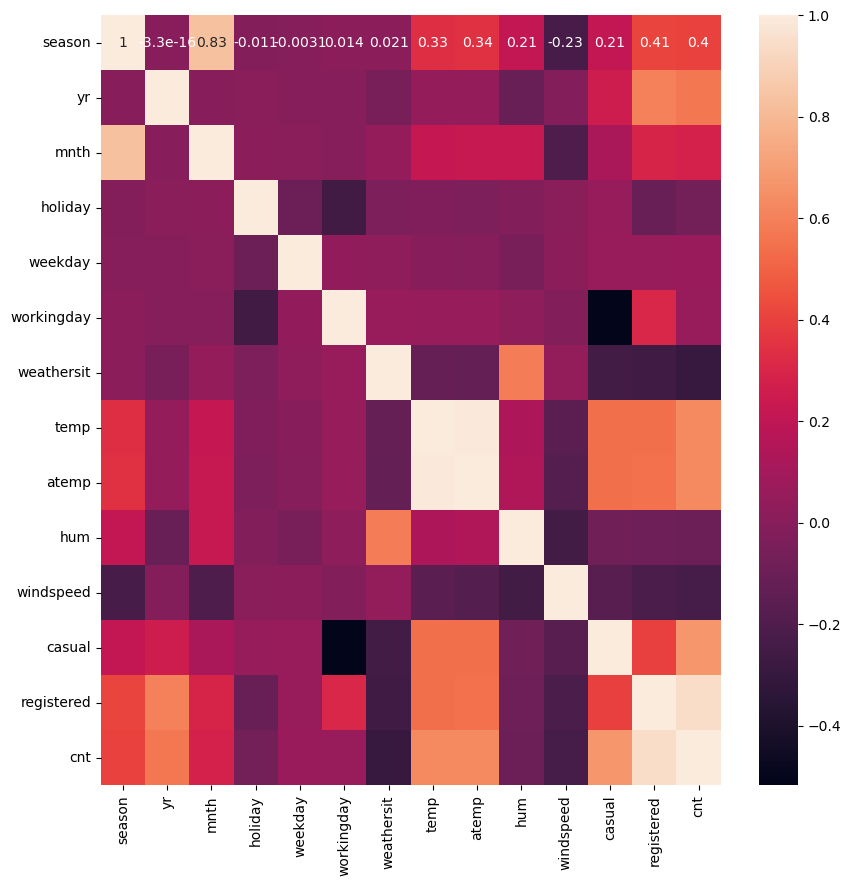

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(bike_df.corr(), annot=True)
plt.show() 

In [15]:
bike_df.corr()

season            yr          mnth   holiday   weekday  \
season      1.000000e+00 -3.279074e-16  8.310321e-01 -0.010868 -0.003081   
yr         -3.279074e-16  1.000000e+00 -5.162656e-16  0.008195 -0.005466   
mnth        8.310321e-01 -5.162656e-16  1.000000e+00  0.018905  0.009523   
holiday    -1.086804e-02  8.195345e-03  1.890483e-02  1.000000 -0.101962   
weekday    -3.081198e-03 -5.466369e-03  9.522969e-03 -0.101962  1.000000   
workingday  1.376178e-02 -2.945396e-03 -4.687953e-03 -0.252948  0.035800   
weathersit  2.130636e-02 -5.032247e-02  4.561335e-02 -0.034395  0.031112   
temp        3.333607e-01  4.878919e-02  2.190833e-01 -0.028764 -0.000168   
atemp       3.420139e-01  4.721519e-02  2.264302e-01 -0.032703 -0.007539   
hum         2.082196e-01 -1.125471e-01  2.249368e-01 -0.015662 -0.052290   
windspeed  -2.296069e-01 -1.162435e-02 -2.080131e-01  0.006257  0.014283   
casual      2.087373e-01  2.505017e-01  1.212079e-01  0.054055  0.059978   
registered  4.103102e-01  5.969106e-01  2.919516e-01 -0.109142  0.057427   
cnt         4.045838e-01  5.697285e-01  2.781909e-01 -0.068764  0.067534   

            workingday  weathersit      temp     atemp       hum  windspeed  \
season        0.013762    0.021306  0.333361  0.342014  0.208220  -0.229607   
yr           -0.002945   -0.050322  0.048789  0.047215 -0.112547  -0.011624   
mnth         -0.004688    0.045613  0.219083  0.226430  0.224937  -0.208013   
holiday      -0.252948   -0.034395 -0.028764 -0.032703 -0.015662   0.006257   
weekday       0.035800    0.031112 -0.000168 -0.007539 -0.052290   0.014283   
workingday    1.000000    0.060236  0.053470  0.052940  0.023202  -0.018666   
weathersit    0.060236    1.000000 -0.119503 -0.120559  0.590277   0.039769   
temp          0.053470   -0.119503  1.000000  0.991696  0.128565  -0.158186   
atemp         0.052940   -0.120559  0.991696  1.000000  0.141512  -0.183876   
hum           0.023202    0.590277  0.128565  0.141512  1.000000  -0.248506   
windspeed    -0.018666    0.039769 -0.158186 -0.183876 -0.248506   1.000000   
casual       -0.517607   -0.246044  0.542731  0.543362 -0.075211  -0.167995   
registered    0.305437   -0.259025  0.539436  0.543678 -0.089212  -0.217914   
cnt           0.062542   -0.295929  0.627044  0.630685 -0.098543  -0.235132   

              casual  registered       cnt  
season      0.208737    0.410310  0.404584  
yr          0.250502    0.596911  0.569728  
mnth        0.121208    0.291952  0.278191  
holiday     0.054055   -0.109142 -0.068764  
weekday     0.059978    0.057427  0.067534  
workingday -0.517607    0.305437  0.062542  
weathersit -0.246044   -0.259025 -0.295929  
temp        0.542731    0.539436  0.627044  
atemp       0.543362    0.543678  0.630685  
hum        -0.075211   -0.089212 -0.098543  
windspeed  -0.167995   -0.217914 -0.235132  
casual      1.000000    0.394137  0.672123  
registered  0.394137    1.000000  0.945411  
cnt         0.672123    0.945411  1.000000

### 'cnt' and 'registered' are highly co-rrelated, hence dropping 'registered' column in the modelling

### 'season', 'mnth', 'weathersit', 'weekday' are categorical variable hence create dummies

### 'casual' is negatively correlated to 'workingday' 

In [16]:
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

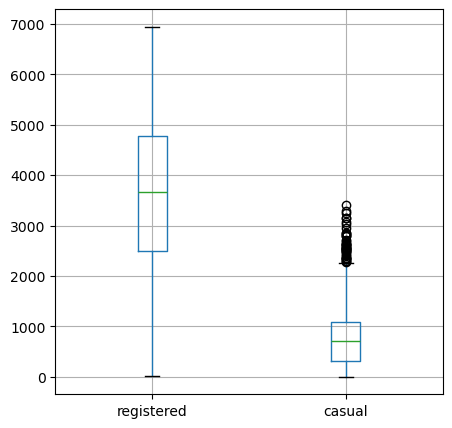

In [17]:
plt.figure(figsize = (5, 5))
bike_df[['registered', 'casual']].boxplot()
plt.show()

No outliers observed in 'registered' or 'casual' riders. The value are within acceptable range

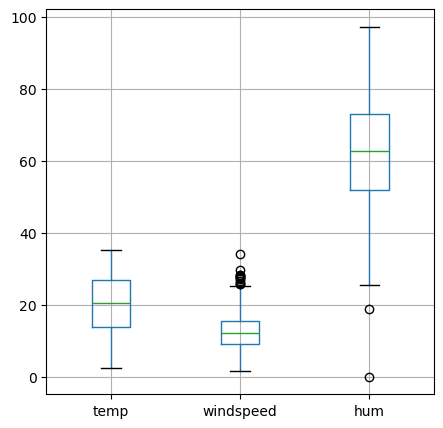

In [18]:
plt.figure(figsize = (5, 5))
bike_df[['temp', 'windspeed', 'hum']].boxplot()
plt.show()

### Handle Categorical variables

In [19]:
bike_df['season'] = bike_df['season'].astype('category')
bike_df['mnth'] = bike_df['mnth'].astype('category')
bike_df['weathersit'] = bike_df['weathersit'].astype('category')
bike_df['weekday'] = bike_df['weekday'].astype('category')


In [20]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  casual      730 non-null    int64   
 12  registered  730 non-null    int64   
 13  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(6)
memory usage: 61.1 KB


In [21]:
new_bike_df = pd.get_dummies(bike_df, drop_first=True, dtype=int)

In [22]:
new_bike_df.shape

(730, 32)

1. season = 1:spring, 2:summer, 3:fall, 4:winter
    - season_2:summer, season_3:fall, season_4:winder
2. month = 1..12 --> mnth_2 .. mnth_12
3. weekday = 1..6 --> weekday_2 .. weekday_6
4. weathersit = 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    -  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mis
    - - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clou
    - 	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + 
    - weathersit_2: Mist, weathersit_3: Light Snow, weathersit_4: Heavy RainFog

In [23]:
new_bike_df.head(5)

yr  holiday  workingday       temp     atemp      hum  windspeed  casual  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882     331   
1   0        0           0  14.902598  17.68695  69.6087  16.652113     131   
2   0        0           1   8.050924   9.47025  43.7273  16.636703     120   
3   0        0           1   8.200000  10.60610  59.0435  10.739832     108   
4   0        0           1   9.305237  11.46350  43.6957  12.522300      82   

   registered   cnt  ...  mnth_11  mnth_12  weekday_1  weekday_2  weekday_3  \
0         654   985  ...        0        0          0          0          0   
1         670   801  ...        0        0          0          0          0   
2        1229  1349  ...        0        0          1          0          0   
3        1454  1562  ...        0        0          0          1          0   
4        1518  1600  ...        0        0          0          0          1   

   weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
0          0          0          1             1             0  
1          0          0          0             1             0  
2          0          0          0             0             0  
3          0          0          0             0             0  
4          0          0          0             0             0  

[5 rows x 32 columns]

In [24]:
new_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   casual        730 non-null    int64  
 8   registered    730 non-null    int64  
 9   cnt           730 non-null    int64  
 10  season_2      730 non-null    int32  
 11  season_3      730 non-null    int32  
 12  season_4      730 non-null    int32  
 13  mnth_2        730 non-null    int32  
 14  mnth_3        730 non-null    int32  
 15  mnth_4        730 non-null    int32  
 16  mnth_5        730 non-null    int32  
 17  mnth_6        730 non-null    int32  
 18  mnth_7        730 non-null    

In [25]:
new_bike_df.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.683562   20.319259   23.726322   62.765175   
std      0.500343    0.167266    0.465405    7.506729    8.150308   14.237589   
min      0.000000    0.000000    0.000000    2.424346    3.953480    0.000000   
25%      0.000000    0.000000    0.000000   13.811885   16.889713   52.000000   
50%      0.500000    0.000000    1.000000   20.465826   24.368225   62.625000   
75%      1.000000    0.000000    1.000000   26.880615   30.445775   72.989575   
max      1.000000    1.000000    1.000000   35.328347   42.044800   97.250000   

        windspeed       casual   registered          cnt  ...     mnth_11  \
count  730.000000   730.000000   730.000000   730.000000  ...  730.000000   
mean    12.763620   849.249315  3658.757534  4508.006849  ...    0.082192   
std      5.195841   686.479875  1559.758728  1936.011647  ...    0.274845   
min      1.500244     2.000000    20.000000    22.000000  ...    0.000000   
25%      9.041650   316.250000  2502.250000  3169.750000  ...    0.000000   
50%     12.125325   717.000000  3664.500000  4548.500000  ...    0.000000   
75%     15.625589  1096.500000  4783.250000  5966.000000  ...    0.000000   
max     34.000021  3410.000000  6946.000000  8714.000000  ...    1.000000   

          mnth_12   weekday_1   weekday_2   weekday_3   weekday_4   weekday_5  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.084932    0.143836    0.142466    0.141096    0.142466    0.142466   
std      0.278971    0.351164    0.349767    0.348359    0.349767    0.349767   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        weekday_6  weathersit_2  weathersit_3  
count  730.000000    730.000000    730.000000  
mean     0.143836      0.336986      0.028767  
std      0.351164      0.473004      0.167266  
min      0.000000      0.000000      0.000000  
25%      0.000000      0.000000      0.000000  
50%      0.000000      0.000000      0.000000  
75%      0.000000      1.000000      0.000000  
max      1.000000      1.000000      1.000000  

[8 rows x 32 columns]

In [26]:
new_bike_df[['registered','cnt']].corr()

registered       cnt
registered    1.000000  0.945411
cnt           0.945411  1.000000

## Drop Registered column as it is directly correlated to the target variable

In [27]:
new_bike_df.drop(columns='registered', inplace=True, axis=1)

## Model Building using 'cnt' as target variable

In [28]:
from sklearn.model_selection import train_test_split
new_bike_train_df, new_bike_test_df =  train_test_split(new_bike_df, train_size=0.8, test_size=0.2, random_state=42)

In [29]:
new_bike_train_df.shape, new_bike_test_df.shape

((584, 31), (146, 31))

In [30]:
new_bike_df.shape

(730, 31)

## Process train dataset for deriving dataset correlation and linear relations between pairs

In [31]:
new_bike_train_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [46]:
sns.pairplot(new_bike_train_df, kind='scatter')
plt.show()

In [32]:
corr_train = new_bike_train_df.corr()

<Axes: >

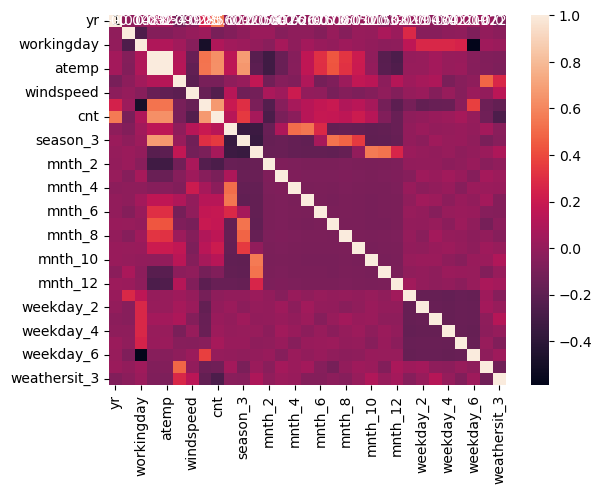

In [33]:
sns.heatmap(corr_train, annot=True)

In [34]:
corr_train

yr   holiday  workingday      temp     atemp       hum  \
yr            1.000000 -0.014052   -0.008840  0.051530  0.053827 -0.099325   
holiday      -0.014052  1.000000   -0.263046 -0.060595 -0.066387 -0.026495   
workingday   -0.008840 -0.263046    1.000000  0.096685  0.101253  0.046885   
temp          0.051530 -0.060595    0.096685  1.000000  0.996569  0.112065   
atemp         0.053827 -0.066387    0.101253  0.996569  1.000000  0.123407   
hum          -0.099325 -0.026495    0.046885  0.112065  0.123407  1.000000   
windspeed    -0.028038  0.004863   -0.047775 -0.160957 -0.185432 -0.207069   
casual        0.245646  0.032292   -0.488222  0.534537  0.538512 -0.103993   
cnt           0.555398 -0.100593    0.100097  0.629226  0.638057 -0.103179   
season_2     -0.021756 -0.061296    0.048468  0.147334  0.152966 -0.019088   
season_3      0.020498 -0.022794    0.030531  0.679530  0.663002  0.011113   
season_4      0.005611  0.025514   -0.002251 -0.226537 -0.207633  0.162745   
mnth_2       -0.000202  0.022211   -0.041041 -0.316313 -0.319008 -0.123922   
mnth_3        0.007563 -0.048378    0.065528 -0.157843 -0.156594 -0.052174   
mnth_4       -0.025983 -0.018772   -0.021849 -0.052906 -0.044226 -0.071059   
mnth_5       -0.007497 -0.023444    0.051351  0.157741  0.162147  0.103865   
mnth_6       -0.007338 -0.056113    0.017646  0.310973  0.301620 -0.114867   
mnth_7        0.015997  0.008101   -0.004272  0.439789  0.434128 -0.078833   
mnth_8       -0.000506 -0.052986    0.037193  0.327086  0.316813  0.026567   
mnth_9        0.017149  0.012877    0.017646  0.207829  0.200835  0.168099   
mnth_10       0.015459  0.005837   -0.008491 -0.016527 -0.003912  0.140115   
mnth_11      -0.031553  0.078222   -0.025544 -0.225940 -0.217135 -0.029401   
mnth_12       0.032091  0.020788   -0.022258 -0.266475 -0.258360  0.123378   
weekday_1     0.019036  0.277866    0.155805  0.004037  0.009869  0.034836   
weekday_2    -0.004667 -0.045664    0.269195  0.013459  0.012115  0.063527   
weekday_3    -0.034401 -0.045664    0.269195  0.053203  0.051162  0.089383   
weekday_4    -0.019632 -0.021733    0.269104  0.010664  0.009498 -0.093517   
weekday_5     0.020795 -0.015255    0.252252  0.018690  0.020548 -0.043392   
weekday_6     0.009695 -0.075164   -0.587942 -0.048027 -0.049542 -0.021440   
weathersit_2  0.022285 -0.010958    0.044082 -0.066947 -0.066050  0.485876   
weathersit_3 -0.071978 -0.033628    0.024977 -0.075100 -0.084691  0.269365   

              windspeed    casual       cnt      season_2  ...   mnth_11  \
yr            -0.028038  0.245646  0.555398 -2.175575e-02  ... -0.031553   
holiday        0.004863  0.032292 -0.100593 -6.129584e-02  ...  0.078222   
workingday    -0.047775 -0.488222  0.100097  4.846791e-02  ... -0.025544   
temp          -0.160957  0.534537  0.629226  1.473338e-01  ... -0.225940   
atemp         -0.185432  0.538512  0.638057  1.529663e-01  ... -0.217135   
hum           -0.207069 -0.103993 -0.103179 -1.908818e-02  ... -0.029401   
windspeed      1.000000 -0.165770 -0.246261  1.287102e-01  ... -0.011634   
casual        -0.165770  1.000000  0.670080  1.964230e-01  ... -0.113873   
cnt           -0.246261  0.670080  1.000000  1.310713e-01  ... -0.067190   
season_2       0.128710  0.196423  0.131071  1.000000e+00  ... -0.180503   
season_3      -0.131111  0.299770  0.346369 -3.470376e-01  ... -0.187924   
season_4      -0.118046 -0.088843  0.067753 -3.378998e-01  ...  0.534192   
mnth_2         0.081190 -0.236129 -0.275684 -1.627702e-01  ... -0.088142   
mnth_3         0.034049 -0.045211 -0.093272  8.818078e-02  ... -0.082479   
mnth_4         0.210664  0.063552 -0.033858  5.124157e-01  ... -0.092493   
mnth_5        -0.006628  0.130922  0.130486  5.415100e-01  ... -0.097744   
mnth_6        -0.016347  0.171712  0.181945  2.755994e-01  ... -0.095667   
mnth_7        -0.098460  0.195059  0.176796 -1.842885e-01  ... -0.099794   
mnth_8        -0.056641  0.105712  0.152024 -1.668212e-01  ... -0.090335   
mnt

In [35]:
new_bike_train_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

<Axes: >

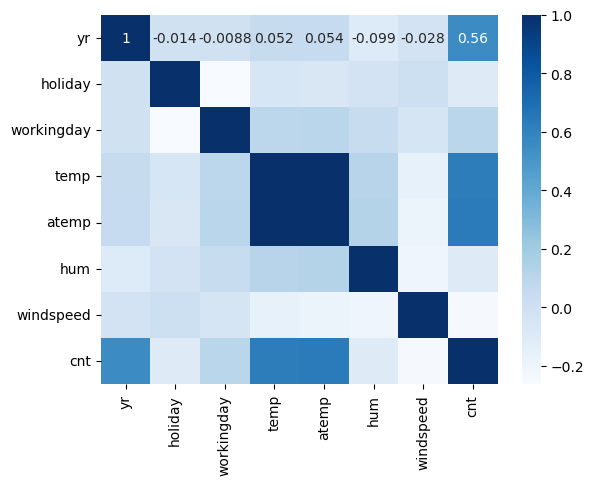

In [36]:
sns.heatmap(new_bike_train_df[['yr','holiday','workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), cmap="Blues", annot=True)

In [37]:
new_bike_train_df[['yr','holiday','workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

yr   holiday  workingday      temp     atemp       hum  \
yr          1.000000 -0.014052   -0.008840  0.051530  0.053827 -0.099325   
holiday    -0.014052  1.000000   -0.263046 -0.060595 -0.066387 -0.026495   
workingday -0.008840 -0.263046    1.000000  0.096685  0.101253  0.046885   
temp        0.051530 -0.060595    0.096685  1.000000  0.996569  0.112065   
atemp       0.053827 -0.066387    0.101253  0.996569  1.000000  0.123407   
hum        -0.099325 -0.026495    0.046885  0.112065  0.123407  1.000000   
windspeed  -0.028038  0.004863   -0.047775 -0.160957 -0.185432 -0.207069   
cnt         0.555398 -0.100593    0.100097  0.629226  0.638057 -0.103179   

            windspeed       cnt  
yr          -0.028038  0.555398  
holiday      0.004863 -0.100593  
workingday  -0.047775  0.100097  
temp        -0.160957  0.629226  
atemp       -0.185432  0.638057  
hum         -0.207069 -0.103179  
windspeed    1.000000 -0.246261  
cnt         -0.246261  1.000000

<Axes: >

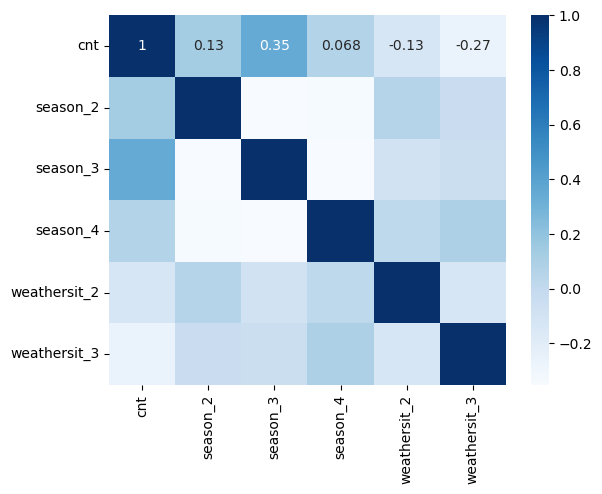

In [38]:
sns.heatmap(new_bike_train_df[['cnt', 'season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3']].corr(), cmap="Blues", annot=True)

<Axes: >

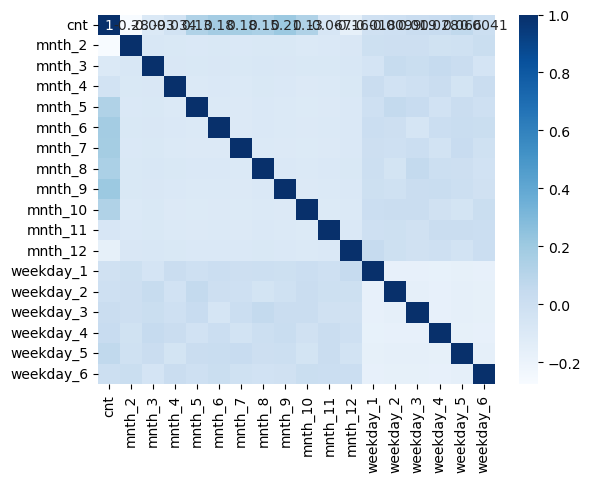

In [39]:
sns.heatmap(new_bike_train_df[['cnt', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6']].corr(), cmap="Blues", annot=True)

In [40]:
new_bike_train_df[['cnt', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6']].corr()

cnt    mnth_2    mnth_3    mnth_4    mnth_5    mnth_6  \
cnt        1.000000 -0.275684 -0.093272 -0.033858  0.130486  0.181945   
mnth_2    -0.275684  1.000000 -0.074376 -0.083406 -0.088142 -0.086268   
mnth_3    -0.093272 -0.074376  1.000000 -0.078047 -0.082479 -0.080725   
mnth_4    -0.033858 -0.083406 -0.078047  1.000000 -0.092493 -0.090527   
mnth_5     0.130486 -0.088142 -0.082479 -0.092493  1.000000 -0.095667   
mnth_6     0.181945 -0.086268 -0.080725 -0.090527 -0.095667  1.000000   
mnth_7     0.176796 -0.089990 -0.084208 -0.094432 -0.099794 -0.097673   
mnth_8     0.152024 -0.081461 -0.076227 -0.085482 -0.090335 -0.088415   
mnth_9     0.208324 -0.086268 -0.080725 -0.090527 -0.095667 -0.093633   
mnth_10    0.129574 -0.091815 -0.085916 -0.096347 -0.101818 -0.099653   
mnth_11   -0.067190 -0.088142 -0.082479 -0.092493 -0.097744 -0.095667   
mnth_12   -0.161597 -0.080476 -0.075305 -0.084448 -0.089243 -0.087346   
weekday_1 -0.018217 -0.006146 -0.050857  0.019162 -0.011156  0.011001   
weekday_2 -0.009889  0.000682  0.034738 -0.027661  0.048492  0.001152   
weekday_3  0.018925  0.000682  0.014652 -0.009449  0.031097 -0.051967   
weekday_4  0.028440 -0.024648  0.047099  0.019162 -0.028123  0.011001   
weekday_5  0.065751 -0.014323  0.018870 -0.042140  0.018642  0.023781   
weekday_6  0.004078  0.015228 -0.048781  0.022237 -0.008214  0.014095   

             mnth_7    mnth_8    mnth_9   mnth_10   mnth_11   mnth_12  \
cnt        0.176796  0.152024  0.208324  0.129574 -0.067190 -0.161597   
mnth_2    -0.089990 -0.081461 -0.086268 -0.091815 -0.088142 -0.080476   
mnth_3    -0.084208 -0.076227 -0.080725 -0.085916 -0.082479 -0.075305   
mnth_4    -0.094432 -0.085482 -0.090527 -0.096347 -0.092493 -0.084448   
mnth_5    -0.099794 -0.090335 -0.095667 -0.101818 -0.097744 -0.089243   
mnth_6    -0.097673 -0.088415 -0.093633 -0.099653 -0.095667 -0.087346   
mnth_7     1.000000 -0.092230 -0.097673 -0.103953 -0.099794 -0.091115   
mnth_8    -0.092230  1.000000 -0.088415 -0.094100 -0.090335 -0.082479   
mnth_9    -0.097673 -0.088415  1.000000 -0.099653 -0.095667 -0.087346   
mnth_10   -0.103953 -0.094100 -0.099653  1.000000 -0.101818 -0.092962   
mnth_11   -0.099794 -0.090335 -0.095667 -0.101818  1.000000 -0.089243   
mnth_12   -0.091115 -0.082479 -0.087346 -0.092962 -0.089243  1.000000   
weekday_1  0.000800  0.006764 -0.006269  0.012365 -0.011156  0.046145   
weekday_2 -0.008375 -0.041640 -0.016554  0.020744 -0.003693 -0.001928   
weekday_3  0.008727  0.051247  0.018859  0.020744 -0.021089 -0.020698   
weekday_4 -0.032562  0.006764  0.028271 -0.020458  0.022777 -0.008778   
weekday_5  0.031063 -0.000194  0.005791 -0.042387  0.018642 -0.035790   
weekday_6 -0.012922 -0.026945 -0.020784  0.015664  0.008918  0.012409   

           weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  
cnt        -0.018217  -0.009889   0.018925   0.028440   0.065751   0.004078  
mnth_2     -0.006146   0.000682   0.000682  -0.024648  -0.014323   0.015228  
mnth_3     -0.050857   0.034738   0.014652   0.047099   0.018870  -0.048781  
mnth_4      0.019162  -0.027661  -0.009449   0.019162  -0.042140   0.022237  
mnth_5     -0.011156   0.048492   0.031097  -0.028123   0.018642  -0.008214  
mnth_6      0.011001   0.001152  -0.051967   0.011001   0.023781   0.014095  
mnth_7      0.000800  -0.008375   0.008727  -0.032562   0.031063  -0.012922  
mnth_8      0.006764  -0.041640   0.051247   0.006764  -0.000194  -0.026945  
mnth_9     -0.006269  -0.016554   0.018859   0.028271   0.005791  -0.020784  
mnth_10     0.012365   0.020744   0.020744  -0.020458  -0.042387   0.015664  
mnth_11    -0.011156  -0.003693  -0.021089   0.022777   0.018642   0.008918  
mnth_12     0.046145  -0.001928  -0.020698  -0.008778  -0.035790   0.012409  
weekday_1   1.000000  -0.166760  -0.166760  -0.172691  -0.163157  -0.170329  
weekday_2  -0.166760   1.000000  -0.161034  -0.166760  -0.157554  -0.164480  
weekday_3  -0.166760  -0.161034   1.000000  -0.166760  -0.157554  -0.1

#### From above correlation tables we can deduce
* yr <--> cnt --> 0.55
* temp <--> atemp --> 0.99
* season_3 <--> cnt --> 0.35
* season_2 <--> cnt --> 0.13
* weathersit_3 <--> cnt --> -0.27
* month_5..month_10 are correlated positively in range 0.12 - 0.2 
* month_2 and month_12 are negatively correlated with -0.27 - -0.16 
* other months are not correlated


# Min Max Scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler()

In [43]:
new_bike_train_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [44]:
## Apply minMax scaler for non boolean columns
cols = ['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'cnt']
new_bike_train_df[cols] = scaler.fit_transform(new_bike_train_df[cols])

In [45]:
new_bike_train_df.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  584.000000  584.000000  584.000000  584.000000  584.000000  584.000000   
mean     0.511986    0.032534    0.672945    0.551484    0.527193    0.654151   
std      0.500285    0.177566    0.469540    0.227249    0.212483    0.146644   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.354266    0.353829    0.542745   
50%      1.000000    0.000000    1.000000    0.566998    0.558730    0.657578   
75%      1.000000    0.000000    1.000000    0.745598    0.698392    0.757346   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed      casual         cnt    season_2  ...     mnth_11  \
count  584.000000  584.000000  584.000000  584.000000  ...  584.000000   
mean     0.410017    0.251387    0.520520    0.250000  ...    0.089041   
std      0.187249    0.200844    0.224926    0.433384  ...    0.285047   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.276424    0.096391    0.371088    0.000000  ...    0.000000   
50%      0.379465    0.213322    0.523527    0.000000  ...    0.000000   
75%      0.520978    0.327612    0.691872    0.250000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

          mnth_12   weekday_1   weekday_2   weekday_3   weekday_4   weekday_5  \
count  584.000000  584.000000  584.000000  584.000000  584.000000  584.000000   
mean     0.075342    0.147260    0.138699    0.138699    0.147260    0.133562   
std      0.264169    0.354669    0.345928    0.345928    0.354669    0.340472   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        weekday_6  weathersit_2  weathersit_3  
count  584.000000    584.000000    584.000000  
mean     0.143836      0.344178      0.032534  
std      0.351224      0.475507      0.177566  
min      0.000000      0.000000      0.000000  
25%      0.000000      0.000000      0.000000  
50%      0.000000      0.000000      0.000000  
75%      0.000000      1.000000      0.000000  
max      1.000000      1.000000      1.000000  

[8 rows x 31 columns]

In [46]:
new_bike_df[['casual','cnt']].corr()

casual       cnt
casual  1.000000  0.672123
cnt     0.672123  1.000000

# Build data for model building
## Get X and y sets from train set

In [47]:
y_train_df = new_bike_train_df.pop('cnt')
X_train_df = new_bike_train_df

## Feature elimination using RFE

In [48]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [49]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train_df, y_train_df)

rfe = RFE(lm, step=15)             # running RFE
rfe = rfe.fit(X_train_df, y_train_df)

In [50]:
list(zip(X_train_df.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 2),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 2),
 ('mnth_3', False, 2),
 ('mnth_4', False, 2),
 ('mnth_5', False, 2),
 ('mnth_6', False, 2),
 ('mnth_7', False, 2),
 ('mnth_8', False, 2),
 ('mnth_9', True, 1),
 ('mnth_10', False, 2),
 ('mnth_11', True, 1),
 ('mnth_12', False, 2),
 ('weekday_1', False, 2),
 ('weekday_2', False, 2),
 ('weekday_3', True, 1),
 ('weekday_4', False, 2),
 ('weekday_5', False, 2),
 ('weekday_6', False, 2),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [51]:
col = X_train_df.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'season_2', 'season_3', 'season_4', 'mnth_9', 'mnth_11', 'weekday_3',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [52]:
X_train_df.columns[~rfe.support_]

Index(['holiday', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_10', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_4',
       'weekday_5', 'weekday_6'],
      dtype='object')

In [53]:
X_train_rfe_df = X_train_df[col]

## Build Linear Regression Model using statsmodel

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Build Stats model with casual parameter as independent variable and cnt as dependent variable

In [55]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train_rfe_df['casual'])

# Create a first fitted model
lr = sm.OLS(y_train_df, X_train_lm).fit()

In [56]:
lr.params

const     0.331873
casual    0.750424
dtype: float64

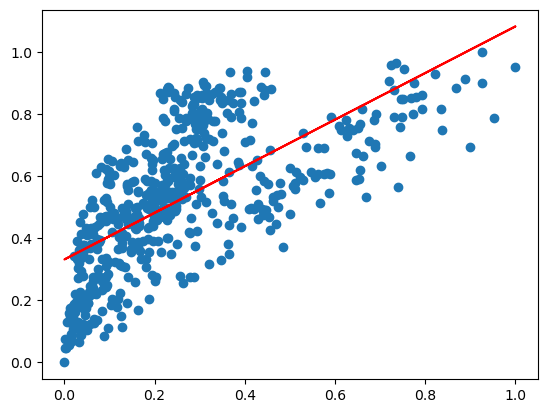

In [57]:
plt.scatter(X_train_lm.iloc[:, 1], y_train_df)
plt.plot(X_train_lm.iloc[:, 1], 0.331873 + 0.750424*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [58]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     474.3
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           2.32e-77
Time:                        17:07:20   Log-Likelihood:                 217.20
No. Observations:                 584   AIC:                            -430.4
Df Residuals:                     582   BIC:                            -421.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3319      0.011     29.942      0.0

## R-square value is 0.449 which is significantly low, let's try to optimize the features list further

In [59]:
# API to build model, print lr.params, plot lm (if plot enabled), print lr.summary 
def build_lr_model_using_statsmodel(title="Building Linear Regression Model", X_train_df=None, y_train_df=None, enable_plot=True):
    print(title + " Using Stats Model")
    # Add a constant
    X_train_lm = sm.add_constant(X_train_df)

    # Create a first fitted model
    lr = sm.OLS(y_train_df, X_train_lm).fit()
    #print("Linear Model for X_traindf.columns {%s} vs y_train_df.columns {%s}" %(str(X_train_df.columns), str(y_train_df.columns)))
    print(lr.params)
    if enable_plot:
        plt.scatter(X_train_lm.iloc[:, 1], y_train_df)
        plt.plot(X_train_lm.iloc[:, 1], dict(lr.params)['const'] + dict(lr.params)[X_train_df.name]*X_train_lm.iloc[:, 1], 'r')
        plt.show()

    print(lr.summary())
    return lr, X_train_lm

In [60]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def get_feature_vif(X_train_df):
    vif = pd.DataFrame()
    vif['Features'] = X_train_df.columns
    vif['VIF'] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    return vif

## Model building with only 'atemp' features 

Linear Regression Model for casual bike rider vs cnt Using Stats Model
const    0.164443
atemp    0.675420
dtype: float64


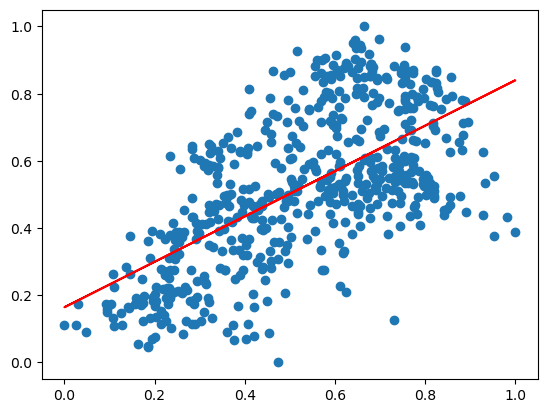

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     399.6
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           4.44e-68
Time:                        17:09:27   Log-Likelihood:                 195.81
No. Observations:                 584   AIC:                            -387.6
Df Residuals:                     582   BIC:                            -378.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1644      0.019      8.564      0.0

In [61]:
title="Linear Regression Model for casual bike rider vs cnt"
lr_atemp, X_train_lm_atemp = build_lr_model_using_statsmodel(title=title, X_train_df=X_train_rfe_df['atemp'], y_train_df=y_train_df)

### R-2 is reduced to 0.407, it is not a good mode fit

## Model Build: Combining 2 independent variables 'casual' and 'atemp'

In [62]:
title="Linear Regression Model for atemp and casual bike rider vs cnt"
lr_casual_atemp, X_train_casual_atemp_lm = build_lr_model_using_statsmodel(title=title, X_train_df=X_train_rfe_df[['casual', 'atemp']], y_train_df=y_train_df, enable_plot=False)

Linear Regression Model for atemp and casual bike rider vs cnt Using Stats Model
const     0.173178
casual    0.514960
atemp     0.413298
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     365.6
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          1.63e-103
Time:                        17:10:22   Log-Likelihood:                 281.06
No. Observations:                 584   AIC:                            -556.1
Df Residuals:                     581   BIC:                            -543.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|   

### R-2 is increased to 0.557, improved by adding casual feature parameter 

## Model building with all the features selected after RFE (Recursive Feature Elimination)

In [63]:
title="Linear Regression Model with all the paramters vs cnt"
lr_model1, X_train_lm1 = build_lr_model_using_statsmodel(title=title, X_train_df=X_train_rfe_df, y_train_df=y_train_df, enable_plot=False)

Linear Regression Model with all the paramters vs cnt Using Stats Model
const           0.074953
yr              0.182147
workingday      0.150425
temp            0.249562
atemp          -0.033642
hum            -0.074348
windspeed      -0.061152
casual          0.564531
season_2        0.077009
season_3        0.066814
season_4        0.154723
mnth_9          0.055553
mnth_11        -0.035887
weekday_3       0.020325
weathersit_2   -0.034240
weathersit_3   -0.186704
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     350.3
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          2.30e-275
Time:                        17:12:26   Log-Likelihood:                 722.76
No. Observations:                 584  

In [64]:
vif = get_feature_vif(X_train_rfe_df)

        Features      VIF
3          atemp  1308.67
2           temp  1282.47
4            hum    17.54
6         casual     7.96
8       season_3     7.54
1     workingday     5.71
5      windspeed     4.89
7       season_2     4.11
9       season_4     3.80
0             yr     2.36
13  weathersit_2     2.24
11       mnth_11     1.66
10        mnth_9     1.33
14  weathersit_3     1.32
12     weekday_3     1.29


### R-2 is increased to 0.902 with 15 features in the dataset 
## Let's try reducing the feature and see if the model still works with higher accuracy

### 'atemp' Drop features with High p-value and High VIF
- feature : p-value   VIF
- atemp     0.858     1308.67
## Build Model after eliminating 'atemp' feature

In [65]:
X_train_rfe_df = X_train_rfe_df.drop(columns='atemp', axis=1)

In [66]:
title="Linear Regression Model after dropping atemp feature vs cnt"
lr_model2, X_train_lm2 = build_lr_model_using_statsmodel(title=title, X_train_df=X_train_rfe_df, y_train_df=y_train_df, enable_plot=False)

Linear Regression Model after dropping atemp feature vs cnt Using Stats Model
const           0.074813
yr              0.182134
workingday      0.150276
temp            0.218226
hum            -0.075107
windspeed      -0.060399
casual          0.564192
season_2        0.076917
season_3        0.067020
season_4        0.154519
mnth_9          0.055703
mnth_11        -0.035897
weekday_3       0.020395
weathersit_2   -0.034101
weathersit_3   -0.186221
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     376.0
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          1.18e-276
Time:                        17:13:10   Log-Likelihood:                 722.74
No. Observations:                 584   AIC:              

In [67]:
vif = get_feature_vif(X_train_rfe_df)

        Features    VIF
2           temp  31.26
3            hum  16.25
5         casual   7.91
7       season_3   7.49
1     workingday   5.64
4      windspeed   4.55
6       season_2   4.10
8       season_4   3.77
0             yr   2.36
12  weathersit_2   2.21
10       mnth_11   1.66
9         mnth_9   1.32
13  weathersit_3   1.29
11     weekday_3   1.28


### R-2 is increased to 0.902 with 14 features in the dataset 
## Let's try reducing the feature and see if the model still works with higher accuracy

### Drop weekday_3 feature with high P-value
- weekday_3       P-Value=0.023
## Build Model after eliminating 'weekday_3' feature

In [68]:
X_train_rfe_df = X_train_rfe_df.drop(columns='weekday_3', axis=1)

In [69]:
title="Linear Regression Model after dropping weekday_3 feature vs cnt"
lm_model3, X_train_lm3 = build_lr_model_using_statsmodel(title=title, X_train_df=X_train_rfe_df, y_train_df=y_train_df, enable_plot=False)

Linear Regression Model after dropping weekday_3 feature vs cnt Using Stats Model
const           0.074451
yr              0.182085
workingday      0.153562
temp            0.219964
hum            -0.072374
windspeed      -0.062381
casual          0.561348
season_2        0.076953
season_3        0.067078
season_4        0.154185
mnth_9          0.055698
mnth_11        -0.035977
weathersit_2   -0.034876
weathersit_3   -0.182525
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     401.5
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          7.62e-277
Time:                        17:13:39   Log-Likelihood:                 720.09
No. Observations:                 584   AIC:                            -1412.


In [70]:
vif = get_feature_vif(X_train_rfe_df)

        Features    VIF
2           temp  31.24
3            hum  16.19
5         casual   7.88
7       season_3   7.49
1     workingday   5.48
4      windspeed   4.52
6       season_2   4.10
8       season_4   3.77
0             yr   2.36
11  weathersit_2   2.20
10       mnth_11   1.66
9         mnth_9   1.32
12  weathersit_3   1.28


### R-2 is increased to 0.902 with 13 features in the dataset 
## Let's try reducing the feature and see if the model still works with higher accuracy

### Drop hum feature with high P-value
- hum  P-Value=0.010  VIF=16.19
## Build Model after eliminating 'hum' feature

In [71]:
X_train_rfe_df = X_train_rfe_df.drop(columns='hum', axis=1)

In [72]:
title="Linear Regression Model after dropping hum feature vs cnt"
lr_model4, X_train_lm4 = build_lr_model_using_statsmodel(title=title, X_train_df=X_train_rfe_df, y_train_df=y_train_df, enable_plot=False)

Linear Regression Model after dropping hum feature vs cnt Using Stats Model
const           0.029835
yr              0.183342
workingday      0.156612
temp            0.204345
windspeed      -0.049210
casual          0.572893
season_2        0.076482
season_3        0.069711
season_4        0.150802
mnth_9          0.050818
mnth_11        -0.034562
weathersit_2   -0.046165
weathersit_3   -0.202583
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     430.2
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          9.52e-277
Time:                        17:14:02   Log-Likelihood:                 716.73
No. Observations:                 584   AIC:                            -1407.
Df Residuals:                  

In [73]:
vif = get_feature_vif(X_train_rfe_df)

        Features    VIF
2           temp  25.33
4         casual   7.79
6       season_3   7.07
1     workingday   5.23
5       season_2   3.99
3      windspeed   3.96
7       season_4   3.75
0             yr   2.36
9        mnth_11   1.65
10  weathersit_2   1.59
8         mnth_9   1.30
11  weathersit_3   1.15


### R-2 dropped to 0.900 with 12 features in the dataset. Not dropped significantly can continue further

### Drop feature with high P value and High VIF
- mnth_11 P-value=0.008, VIF=1.65
## Build Model after eliminating 'mnth_11' feature

In [74]:
X_train_rfe_df = X_train_rfe_df.drop(columns='mnth_11', axis=1)

In [75]:
title="Linear Regression Model after dropping mnth_11 feature vs cnt"
lr_model5, X_train_lm5 = build_lr_model_using_statsmodel(title=title, X_train_df=X_train_rfe_df, y_train_df=y_train_df, enable_plot=False)

Linear Regression Model after dropping mnth_11 feature vs cnt Using Stats Model
const           0.024594
yr              0.183396
workingday      0.157656
temp            0.218231
windspeed      -0.050615
casual          0.577059
season_2        0.070965
season_3        0.060564
season_4        0.135184
mnth_9          0.054355
weathersit_2   -0.044272
weathersit_3   -0.198236
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     463.7
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          1.53e-276
Time:                        17:14:20   Log-Likelihood:                 713.07
No. Observations:                 584   AIC:                            -1402.
Df Residuals:                     572   BIC:        

In [76]:
vif = get_feature_vif(X_train_rfe_df)

        Features    VIF
2           temp  24.76
4         casual   7.78
6       season_3   6.82
1     workingday   5.23
5       season_2   3.91
3      windspeed   3.87
7       season_4   2.75
0             yr   2.36
9   weathersit_2   1.58
8         mnth_9   1.29
10  weathersit_3   1.14


### R-2 dropped to 0.899 with 11 features in the dataset. Not dropped significantly can continue further

### Drop feature with high P value and High VIF
- windspeed P-value=0.003, VIF=3.87
## Build Model after eliminating 'windspeed' feature

In [77]:
X_train_rfe_df = X_train_rfe_df.drop(columns='windspeed', axis=1)

In [78]:
title="Linear Regression Model after dropping windspeed feature vs cnt"
lr_model6, X_train_lm6 = build_lr_model_using_statsmodel(title=title, X_train_df=X_train_rfe_df, y_train_df=y_train_df, enable_plot=False)

Linear Regression Model after dropping windspeed feature vs cnt Using Stats Model
const          -0.002288
yr              0.182361
workingday      0.161470
temp            0.221056
casual          0.590223
season_2        0.066705
season_3        0.059580
season_4        0.137055
mnth_9          0.054721
weathersit_2   -0.043611
weathersit_3   -0.203924
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     502.2
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          5.64e-276
Time:                        17:14:41   Log-Likelihood:                 708.53
No. Observations:                 584   AIC:                            -1395.
Df Residuals:                     573   BIC:                            -13

In [79]:
vif = get_feature_vif(X_train_rfe_df)

       Features    VIF
2          temp  22.74
3        casual   7.78
5      season_3   6.63
1    workingday   5.13
4      season_2   3.91
6      season_4   2.75
0            yr   2.31
8  weathersit_2   1.55
7        mnth_9   1.28
9  weathersit_3   1.10


### R-2 dropped to 0.898 with 10 features in the dataset. Not dropped significantly can continue further

### Drop feature with high P value and high VIF
- temp P-value=0 VIF=22.74
## Build Model after eliminating 'temp' feature

In [80]:
X_train_rfe_df = X_train_rfe_df.drop(columns='temp', axis=1)

In [81]:
title="Linear Regression Model after dropping temp feature vs cnt"
lr_model7, X_train_lm7 = build_lr_model_using_statsmodel(title=title, X_train_df=X_train_rfe_df, y_train_df=y_train_df, enable_plot=False)

Linear Regression Model after dropping temp feature vs cnt Using Stats Model
const           0.038556
yr              0.177746
workingday      0.186646
casual          0.684203
season_2        0.113569
season_3        0.150432
season_4        0.162670
mnth_9          0.046096
weathersit_2   -0.040541
weathersit_3   -0.198460
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     493.8
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          1.31e-263
Time:                        17:15:15   Log-Likelihood:                 676.27
No. Observations:                 584   AIC:                            -1333.
Df Residuals:                     574   BIC:                            -1289.
Df Model:                 

In [82]:
vif = get_feature_vif(X_train_rfe_df)

       Features   VIF
2        casual  4.88
4      season_3  3.55
1    workingday  3.15
3      season_2  3.10
5      season_4  2.36
0            yr  2.31
7  weathersit_2  1.48
6        mnth_9  1.27
8  weathersit_3  1.08


### R-2 dropped to 0.886 with 9 features in the dataset. 
### Final Model still close to 1st model which has R2-score=0.902 and 12 features

## Final Model summary:
- R-2 = 0.886 and F-score = 493.8
-                                                        **Parameters and coeeficients**

|sl |feature        | coeff       | Remarks         |
|:--|:--------------|:------------|:----------------|
|1. |const          | 0.038556    |                 |
|2. |yr             | 0.177746    |                 |
|3. |workingday     | 0.186646    |                 |
|4. |casual         | 0.684203    |                 |
|5. |season_2       | 0.113569    | Season: Summer  |
|6. |season_3       | 0.150432    | Season: Fall    |
|7. |season_4       | 0.162670    | Season: Winter  |
|8. |mnth_9         | 0.046096    |                 |
|9. |weathersit_2   |-0.040541    | Mist + Cloudy   |
|10.|weathersit_3   |-0.198460    |Light Snow       |ight Snow

## Residual Analysis on the train data

- lr_model7,  X_train_lm7 Model is selected for analysis
- Training dataset: X_train_rfe_df and y_train_df
- Test dataset: X_test_df and y_test_df

In [83]:
y_train_pred = lr_model7.predict(X_train_lm7)

Text(0.5, 0, 'Errors')

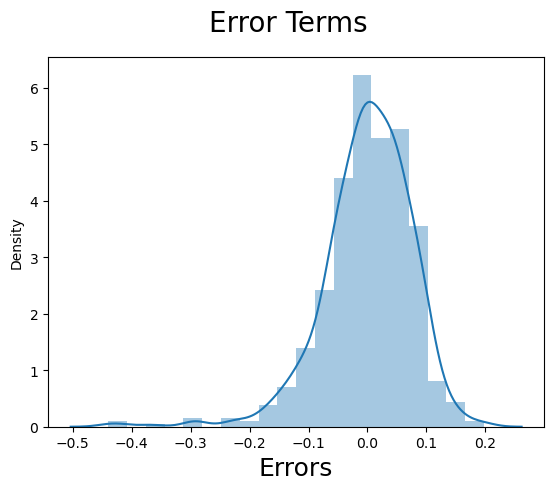

In [84]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_df - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Error term is normally distributed around 0

# Evaluate model on test data and make Predictions

In [85]:
X_train_rfe_df.columns

Index(['yr', 'workingday', 'casual', 'season_2', 'season_3', 'season_4',
       'mnth_9', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [86]:
## Apply minMax scaler for non boolean columns
#cols = ['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'cnt']
new_bike_test_df[cols] = scaler.transform(new_bike_test_df[cols])

In [87]:
new_bike_test_df.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  146.000000  146.000000  146.000000  146.000000  146.000000  146.000000   
mean     0.452055    0.013699    0.726027    0.513327    0.486680    0.617324   
std      0.499409    0.116637    0.447530    0.229925    0.217533    0.143761   
min      0.000000    0.000000    0.000000    0.047675    0.051010    0.193646   
25%      0.000000    0.000000    0.000000    0.317742    0.306197    0.516316   
50%      0.000000    0.000000    1.000000    0.483409    0.471301    0.601975   
75%      1.000000    0.000000    1.000000    0.723272    0.677047    0.714815   
max      1.000000    1.000000    1.000000    0.960541    0.939531    1.002146   

        windspeed      casual         cnt    season_2  ...     mnth_11  \
count  146.000000  146.000000  146.000000  146.000000  ...  146.000000   
mean     0.461923    0.237481    0.498457    0.260274  ...    0.054795   
std      0.214336    0.204082    0.213583    0.440294  ...    0.228362   
min      0.062226    0.011737    0.142775    0.000000  ...    0.000000   
25%      0.294317    0.071890    0.310084    0.000000  ...    0.000000   
50%      0.445562    0.202612    0.503164    0.000000  ...    0.000000   
75%      0.547829    0.309786    0.665526    1.000000  ...    0.000000   
max      1.213032    0.962735    0.981707    1.000000  ...    1.000000   

          mnth_12   weekday_1   weekday_2   weekday_3   weekday_4   weekday_5  \
count  146.000000  146.000000  146.000000  146.000000  146.000000  146.000000   
mean     0.123288    0.130137    0.157534    0.150685    0.123288    0.178082   
std      0.329899    0.337612    0.365558    0.358973    0.329899    0.383899   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        weekday_6  weathersit_2  weathersit_3  
count  146.000000    146.000000    146.000000  
mean     0.143836      0.308219      0.013699  
std      0.352131      0.463347      0.116637  
min      0.000000      0.000000      0.000000  
25%      0.000000      0.000000      0.000000  
50%      0.000000      0.000000      0.000000  
75%      0.000000      1.000000      0.000000  
max      1.000000      1.000000      1.000000  

[8 rows x 31 columns]

## Split X and y variables

In [88]:
y_test_df = new_bike_test_df.pop('cnt')
X_test_df = new_bike_test_df

In [89]:
X_test_new_df = X_test_df[X_train_rfe_df.columns]

## Predict 'cnt' variable on test data set

In [90]:
X_test_new_df = sm.add_constant(X_test_new_df)
y_test_pred = lr_model7.predict(X_test_new_df)

## Evaluate Model on test data set

Text(0, 0.5, 'y_test_pred')

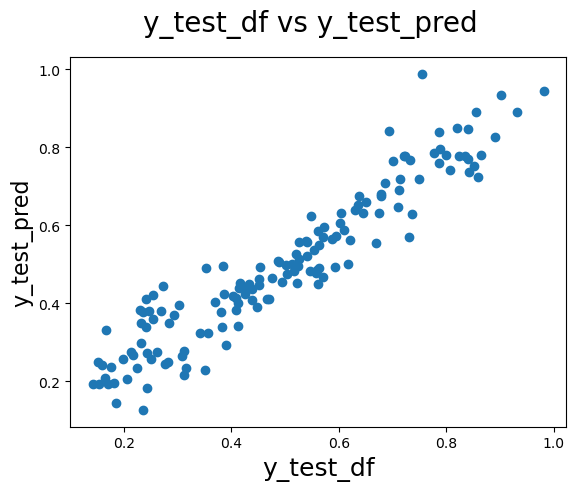

In [91]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test_df,y_test_pred)
fig.suptitle('y_test_df vs y_test_pred', fontsize=20)         # Plot heading 
plt.xlabel('y_test_df', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)     

In [92]:
from sklearn.metrics import r2_score
print("Train data set R2 score",round(r2_score(y_train_df, y_train_pred),5))
print("Test data set R2 score",round(r2_score(y_test_df, y_test_pred),5))

Train data set R2 score 0.88562
Test data set R2 score 0.89103


## R2 score is significantly good on test data set